Сгенерируем выборку $X_1,...,X_{100}$ из распределения $N(0,1)$. Для каждого $n \leq 100$ в модели $N(\theta, 1)$ найдем оценку максимального равдоподобия$(\bar{X})$ по выборке $X_1,.., X_n$ и байесовскую оценку, для которой в качестве априорного распределения возьмем сопряженное из теор. задачи 8.3, а именно $N(\frac{\sum X_i + \frac{a}{\sigma^2}}{n + \sigma^{-2}}, \frac{1}{n + \sigma^{-2}})$. Возьмем несколько параметров сдвига и масштаба для априорного распределения. Построим графики абсолютной величины отклонения оценки от истинного значения параметра в зависимости от n для оценки максимального правдоподобия и байесовских оценок, которым соответствуют разные значения параметров априорного распределения (5 кривых на одном графике).

In [13]:
import scipy.stats as stats
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import pylab
import seaborn as sns
%matplotlib inline

In [19]:
N = 100
def bayesian_estimate_mean(a, sig_2):
    return lambda X: (np.sum(X) + a / sig_2) / (len(X) + 1. / sig_2)

In [72]:
def do_task(apriori_params, variance, sigma, ylim=2, real=0):
    sample = stats.norm.rvs(variance, sigma, size=N)
    x = np.arange(0, N, 1)
    estim = np.zeros(N)
    fig = plt.figure(figsize=(14,7))
    last_val = []
    for func, label in apriori_params:
        for n in range(N):
            estim[n] = np.abs(func(sample[:(n + 1)]) - real)
        plt.plot(x, estim, label=label)
        last_val.append(estim[N - 1])
    plt.legend(fontsize=10,loc=2)
    plt.xlabel("n")
    plt.ylabel("Values")
    pylab.ylim(0,ylim)
    plt.title("Difference between estimations and real")
    plt.show()
    print("Max likehood on the 20th step:", np.abs(apriori_params[0][0](sample[:21])))
    print("Values on the last step:")
    i=0
    for func, label in apriori_params:
        print(label, last_val[i])
        i += 1

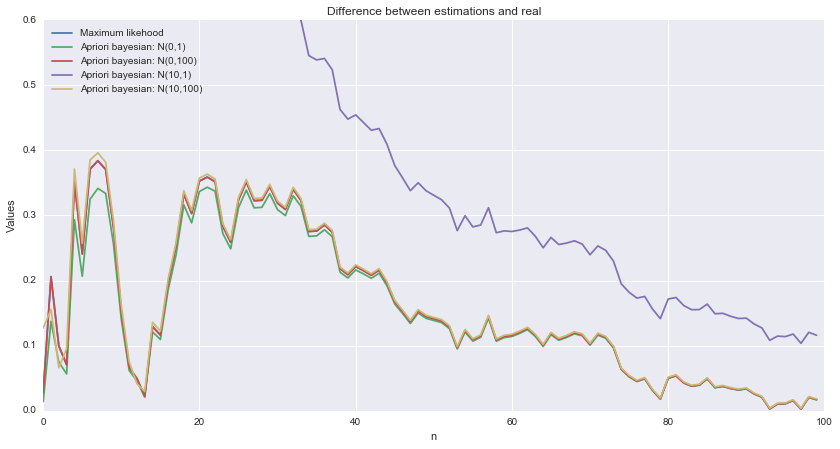

Max likehood on the 20th step: 0.352986316807
Values on the last step:
Maximum likehood 0.0171717603114
Apriori bayesian: N(0,1) 0.0170017428825
Apriori bayesian: N(0,100) 0.017170043307
Apriori bayesian: N(10,1) 0.116011643873
Apriori bayesian: N(10,100) 0.018169943317


In [76]:
do_task(apriori_params = [
        (lambda X: np.average(X), "Maximum likehood"),
        (bayesian_estimate_mean(0, 1), "Apriori bayesian: N(0,1)"),
        (bayesian_estimate_mean(0, 100), "Apriori bayesian: N(0,100)"),
        (bayesian_estimate_mean(10, 1), "Apriori bayesian: N(10,1)"),
        (bayesian_estimate_mean(10, 100), "Apriori bayesian: N(10,100)")], variance=0, sigma=1, ylim = 0.6, real=0)

Заметим, что оценка максимального правдоподобия, почти совпадает с байесовской оценкой, только в байесовской оценке c априорным $N(0, 1)$ получается $\frac{\sum X_i}{n + 1}$ в знаменателе $n + 1$ а не n.

### Вывод. Байесовские оценки с априорным распределением $N(0,1),N(0,10),N(10,100)$ сходятся почти одинаково быстро, так же как и оценка максимального правдоподобия к нужному значению. Оценка с априорным распределением $N(10, 1)$ сходится дольше других, это видно из формулы, так как в ней матожидание больше дисперсии, и она оказывает большее влияние(смещение) чем в других случаях.

Аналогичные исследования проведем для модели $N(0,\theta)$. Возьмем другие параметры для априорного распределения.
Оценка из теор. задачи 4, где a и b параметры обратного Гамма распределения:

In [78]:
def bayesian_estimate_disp(a, b):
    return lambda X: (2 * b + np.sum(X**2)) / (2 * a  + len(X) - 2)

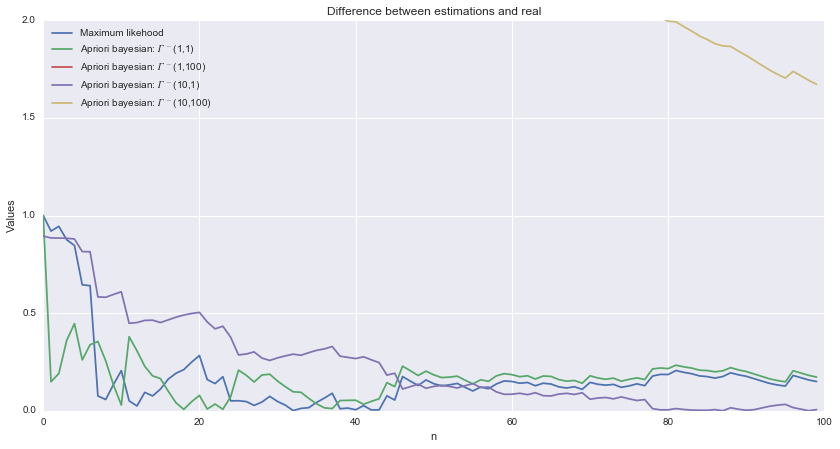

Max likehood on the 20th step: 0.716933894389
Values on the last step:
Maximum likehood 0.149923034763
Apriori bayesian: $Г^-$(1,1) 0.17266692069
Apriori bayesian: $Г^-$(1,100) 2.15266692069
Apriori bayesian: $Г^-$(10,1) 0.00621447399195
Apriori bayesian: $Г^-$(10,100) 1.6717516277


In [84]:
do_task(apriori_params = [
        (lambda X: stats.moment(X,2), r"Maximum likehood"),
        (bayesian_estimate_disp(1, 1), r"Apriori bayesian: $Г^-$(1,1)"),
        (bayesian_estimate_disp(1, 100), r"Apriori bayesian: $Г^-$(1,100)"),
        (bayesian_estimate_disp(10, 1), r"Apriori bayesian: $Г^-$(10,1)"),
        (bayesian_estimate_disp(10, 100), r"Apriori bayesian: $Г^-$(10,100)")], variance=0, sigma=1, ylim = 2, real = 1)

### Вывод. Теперь байесовская оценки с априорным $Г^-$ с параметрами (10,1) сходится к реальному значению дисперсии быстрее всего, затем чуть хуже сходятся метод максимального правдоподобия и с параметрами (1,1), оставшиеся сходятся хуже. Это означает что при удачном подборе параметров в априорном распределении, можно получить быструю сходимость.

In [87]:
# Проделаем тоже самое для N = 1000
N = 1000

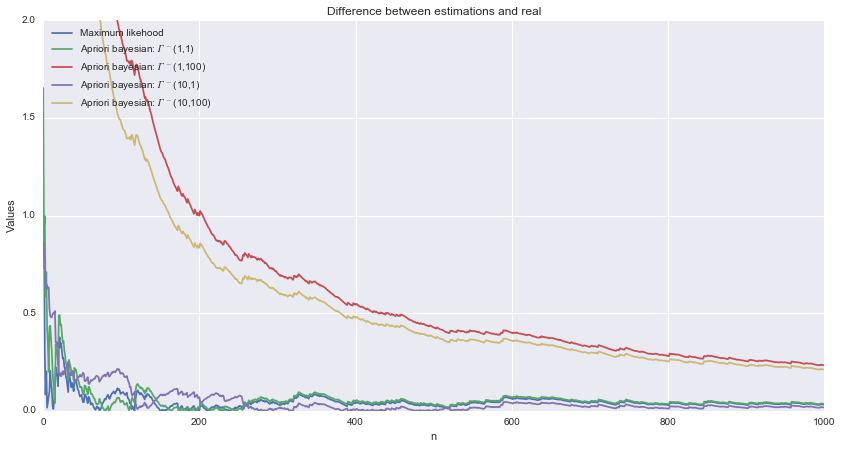

Max likehood on the 20th step: 1.3457249617
Values on the last step:
Maximum likehood 0.0318593507711
Apriori bayesian: $Г^-$(1,1) 0.0356080982576
Apriori bayesian: $Г^-$(1,100) 0.233608098258
Apriori bayesian: $Г^-$(10,1) 0.0172967566381
Apriori bayesian: $Г^-$(10,100) 0.21179577432


In [88]:
do_task(apriori_params = [
        (lambda X: stats.moment(X,2), r"Maximum likehood"),
        (bayesian_estimate_disp(1, 1), r"Apriori bayesian: $Г^-$(1,1)"),
        (bayesian_estimate_disp(1, 100), r"Apriori bayesian: $Г^-$(1,100)"),
        (bayesian_estimate_disp(10, 1), r"Apriori bayesian: $Г^-$(10,1)"),
        (bayesian_estimate_disp(10, 100), r"Apriori bayesian: $Г^-$(10,100)")], variance=0, sigma=1, ylim = 2, real = 1)

Видно, что наши предположения подтверждаются на большей выборке.